## 1. Implement models in Stan 

Call center data set — exponential likelihood with gamma prior. Estimate the number of calls per minute for the 11th hour of the call center data set.
Results to compute:
- Posterior 95% confidence interval over λ (check that it matches results in the
solution notebook below)
- Histogram of posterior λ samples

Resources for you to use:
- Data set: call_center.csv
- Solution for class activity (call_center_solution.ipynb)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import numpy as np
import pystan
import matplotlib.mlab as mlab

waiting_times_day = pd.read_csv("https://course-resources.minerva.kgi.edu/uploaded_files/mke/00073825-8976/call-center.csv", header = None)

current_time = 0
waiting_times_per_hour = [[] for _ in range(24)]  # Make 24 empty lists, one per hour
for t in waiting_times_day.iloc[:,0]:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

In [28]:
stan_code = """
data {  
    int<lower=1> N;
    real<lower=0> y[N];  // waiting time before call
    real<lower=0> alpha;
    real<lower=0> beta;
}

parameters {
    real<lower=0> lambda;  
}

model {
    lambda ~ gamma(alpha, beta);  // prior over p
    y ~ exponential(lambda);
}

"""

stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_517b0b5d84655d237d93c53821eb81b3 NOW.


In [29]:
# alpha prior is 1, beta prior is 0.25 following the previous assignment
data = {'N': len(waiting_times_per_hour[11]), 'y': waiting_times_per_hour[11], 'alpha': 1, 'beta': 0.25}

# train the model on the data
stan_results = stan_model.sampling(data=data)

# display model summary for lambda parameter
print(stan_results.stansummary(pars=['lambda'], probs=[0.025, 0.5, 0.975]))

Inference for Stan model: anon_model_517b0b5d84655d237d93c53821eb81b3.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    50%  97.5%  n_eff   Rhat
lambda  14.88    0.01   0.48  13.95  14.87  15.83   1420    1.0

Samples were drawn using NUTS at Thu Oct 18 22:17:16 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


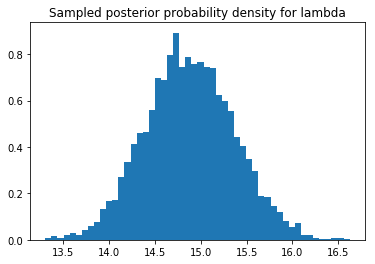

In [30]:
posterior_samples = stan_results.extract()

plt.hist(posterior_samples['lambda'], bins=50, density=True)
plt.title('Sampled posterior probability density for lambda')
plt.show()

In [31]:
print("Posterior 95% confidence interval for lambda:", np.percentile(posterior_samples['lambda'], [2.5, 97.5]))

Posterior 95% confidence interval for lambda: [13.95053005 15.83183473]


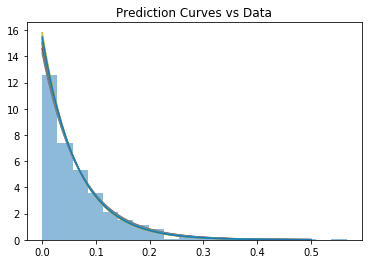

In [36]:
# Draw the histogram of the data
plt.hist(waiting_times_per_hour[11], density=True, bins=20, alpha = 0.5, lw = 3)

x = np.linspace(0, 0.5, 1000)

# choose 10 of the 4000 generated lambdas, and draw 10 corresponding exponential curves
for i in posterior_samples['lambda'][np.random.randint(0, 4000, 10)]:
    plt.plot(x, ss.expon.pdf(x, scale = 1/i))
    

plt.title("Prediction Curves vs Data")
plt.show()

## 2. Normal likelihood with normal-inverse-gamma prior
Results to compute:
- 95% posterior confidence intervals for the mean μ and variance σ of the data.
- Take 10 samples from your posterior over μ and σ^2 and plot the normal distributions corresponding to them. See Task 3 in the solutions below — you should produce a plot similar the one you find there.

In [37]:
stan_code = """
data {
   real mu;
   real nu;
   real<lower=0> alpha;
   real<lower=0> beta;
   int<lower=1> N;
   real y[N];
}

parameters {
    real mean1;
    real<lower=0> var1;
}
model {
   mean1 ~ normal(mu, sqrt(var1/nu));
   var1 ~ inv_gamma(alpha, beta);
   y ~ normal(mean1, sqrt(var1));
}
"""
stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5113ce65f97ef3078ae8bcb7b8cad5cd NOW.


In [38]:
arr = np.array([3.54551763569501, 4.23799861761927, 4.72138425951628, -0.692265320368236, 3.04473513808788, 3.10721270732507, 3.42982225852764, 3.12153903971176, 3.60532628639808, 2.46561737557325, 1.64059465916131, 2.4621623937158, 2.76744495617481, 2.11580054750407, 5.14077208608354, 4.90288499104252, 1.43357579078348, 4.78997817363558, 1.93633438207439, 2.43698838097178, 3.95389148701877, 2.4242295507716, 2.90256268679023, 2.90931728045901, 0.658072819386888, 3.05946763895983, 3.42615331539605, 2.68842833004417, 2.35850130765166, 2.20014998540933, 4.73846511350084, 4.19839721414451, 2.11805510171691, -0.572742936038015, 0.389413982010623, 3.87846130744249, 1.34057656890858, 0.7235748351719, 5.11042369840174, 4.00747556696571, 3.18080956726965, 3.24677964069676, 5.1154659863626, 1.80276616697155, 0.305877679021404, -0.449168307882718, 4.63705561194774, 1.37783714058301, 4.9608149859515, 6.7764195802069, 1.75515522922399, 7.04457337435215, 0.625185284955128, 2.25130734369064, 2.19770178119255, 2.16858257249432, 6.25367644481438, 0.116081323476489, 2.06315857864341, 1.82409781471718, 5.15226741230987, 2.03408231293173, -1.12450854337596, 5.03511270642234, 2.03841989653263, 5.80911741751597, 2.31718128783245, 4.97575010580997, 3.34262752222776, -0.786983904253601, 0.777362359850013, 0.975825009321195, 3.76354577515958, 7.27215002907876, 1.35404089480189, 3.76567940257157, 3.48573993343334, 1.85976988586156, 1.93567061960716, 5.31071812003942, 2.96832987672751, 3.32378908637275, 2.61631960054551, 5.80897964052825, 4.95215217171488, 1.32036772796131, 3.79932542233371, 3.08108492766309, 2.6734110081666, -0.14251851138521, 2.48744375588965, 3.98463042123415, 6.32781680028, 4.0029172024315, 4.23210369459457, 1.71412938967325, 5.16492114963802, 2.53409673107906, 4.77346963973334, 3.34088878725551, 4.77681472750664, 3.81135755590976, 1.14054269983137, 1.42057452397702, 0.132142311125433, 7.12577254064672, 4.85422012781764, 4.15745720676399, 4.48763147363348, 1.56060322283629, 2.64821761542887, 1.26655351354548, 4.48497722937931, 4.3286302403783, 4.26157679512625, 4.0597558651364, 5.14051109132496, 2.5660348362221, 1.10764013818617, 0.386889523012303, 3.54150473246237, 3.57480214382351, 1.95150869584847, 2.70688970563118, 2.47971849820016, 6.50838037000679, 4.01511556826974, 1.11562740835344, 5.02637639472439, 4.38184491686864, 5.60423144047386, 2.40067408379298, 5.7849941378344, 2.37225791084559, 6.86031465910273, 4.09214858239736, 6.85994063692621, 3.62202415158781, -1.11220646958158, 3.73920971696866, 3.24533871512216, 1.28724203643002, 0.291152541773164, 0.368630935755111, 6.71607270510525, 5.42278455200833, 5.35188416119281, 2.305874586163, -1.85878097203032, 2.69877382351447, 4.84121860550417, 4.40973060799391, 5.04399320650774, 2.68632252661298, 6.06531610659912, 3.11881325011993, 3.45532087005125, 3.08442259840346, 4.43564424136733, 2.84252623135804, 1.50536798885106, 1.48868622407603, 2.07322837615663, 2.5476910210998, 5.66941808257884, 2.16731067416426, 2.49843958833905, 3.94586413879977, 0.316433764679541, -0.608937441815983, 2.5943436558557, 1.05516869528337, 2.1447601332725, 6.65846634141906, 2.1771555267834, 5.23953812029442, 3.53629759842647, 6.03263538017003, 3.85739159396599, 5.95093453004638, 1.12856987160476, 3.5559912886093, 2.21974864244489, 3.38471394882135, -1.90805399279409, 3.5113699258973, 4.49319955412346, 5.10507952638867, 1.08277895384184, 4.58403638422759, 1.37304994426824, 4.17566975753523, 3.36454182510378, 0.177136582644021, 2.91337423388405, 3.22796455457526, 2.80124198378441, 1.95189718582788, 3.37659263896246, -1.6463045238231])

In [40]:
# mu, nu, alpha and beta priors were given in previous assignment
data = {'N': len(arr), 'y': arr, 'mu': 0, 'nu':  0.054, 'alpha': 1.12, 'beta': 0.4,}

# train model on the data
stan_results = stan_model.sampling(data=data)

# display model summary for mean and variance
print(stan_results.stansummary(pars=['mean1', 'var1'], probs=[0.025, 0.5, 0.975]))

Inference for Stan model: anon_model_5113ce65f97ef3078ae8bcb7b8cad5cd.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    50%  97.5%  n_eff   Rhat
mean1   3.07  2.3e-3   0.13    2.8   3.07   3.32   3132    1.0
var1    3.63  7.0e-3   0.37   2.97    3.6   4.42   2743    1.0

Samples were drawn using NUTS at Thu Oct 18 22:22:19 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [41]:
posterior_samples = stan_results.extract()
print("Posterior 95% confidence interval for mu:", np.percentile(posterior_samples['mean1'], [2.5, 97.5]))
print("Posterior 95% confidence interval for variance:", np.percentile(posterior_samples['var1'], [2.5, 97.5]))

Posterior 95% confidence interval for mu: [2.80499032 3.32246629]
Posterior 95% confidence interval for variance: [2.97012318 4.41506675]


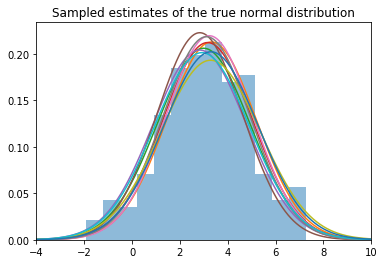

In [42]:
# use zip to join the mean column and variance column into a 4000 X 2 matrix, list makes it subsettable
meanvars = np.array(list(zip(posterior_samples['mean1'], posterior_samples['var1'])))

# display histogram
plt.hist(arr, density = True, bins = 13, alpha = 0.5, lw = 3)

x = np.linspace(-4, 10, 1000)

# choose 10 random rows from the matrix, and plot using mean and variance from each row
for i in meanvars[np.random.randint(0, 4000, 10), ]:
    plt.plot(x, ss.norm.pdf(x, i[0], np.sqrt(i[1])))

plt.title('Sampled estimates of the true normal distribution')
plt.xlim(-4, 10)
plt.show()

## 3. Log-normal HRTEM data.
Normal likelihood log-transformed data and using a normal-inverse-gamma prior
Results to compute:
- 95% posterior confidence intervals for the μ and variance σ^2 of the log-transformed data. (Should match results under Task 3 of the solutions.)
- Take 10 samples from your posterior over μ and σ^2 and plot the log-normal distributions corresponding to them. See Task 5 in the solutions below — you should produce a plot similar the one you find there, but with 10 pdfs rather than one.

In [3]:
stan_code = """
data {
   real mu;
   real nu;
   real<lower=0> alpha;
   real<lower=0> beta;
   int<lower=1> N;
   real y[N];
}

transformed data {
    real logy[N];
    logy = log(y);
}

parameters {
    real mean1;
    real<lower=0> var1;
}

model {
   mean1 ~ normal(mu, sqrt(var1/nu));
   var1 ~ inv_gamma(alpha, beta);
   logy ~ normal(mean1, sqrt(var1));
}
"""
stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1789d37c32094fa2ce0ad47ee3144e54 NOW.


In [4]:
# import data and set up priors
df = pd.read_csv("https://course-resources.minerva.kgi.edu/uploaded_files/mke/00075398-1635/hrtem.csv", header = None)
data = {'y':df.iloc[:,0], 'N': len(df.iloc[:,0]), 'mu': 2.3, 'nu': 0.1, 'alpha': 2, 'beta': 5}

# training model on data
stan_results = stan_model.sampling(data=data)

# output model summary
print(stan_results.stansummary(pars=['mean1', 'var1'], probs=[0.025, 0.5, 0.975]))

Inference for Stan model: anon_model_1789d37c32094fa2ce0ad47ee3144e54.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    50%  97.5%  n_eff   Rhat
mean1   1.89  5.3e-4   0.03   1.83   1.89   1.96   3720    1.0
var1     0.5  5.2e-4   0.03   0.44    0.5   0.56   3647    1.0

Samples were drawn using NUTS at Fri Oct 19 17:07:57 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [5]:
posterior_samples = stan_results.extract()
print("Posterior 95% confidence interval for mu:", np.percentile(posterior_samples['mean1'], [2.5, 97.5]))
print("Posterior 95% confidence interval for variance:", np.percentile(posterior_samples['var1'], [2.5, 97.5]))

Posterior 95% confidence interval for mu: [1.82817402 1.95571546]
Posterior 95% confidence interval for variance: [0.43756053 0.56031691]


In [9]:
max(df.iloc[:,0])

28.9425775960553

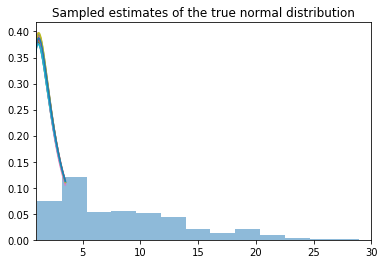

In [13]:
# use zip to join the mean column and variance column into a 4000 X 2 matrix, list makes it subsettable
meanvars = np.array(list(zip(posterior_samples['mean1'], posterior_samples['var1'])))

# display histogram of logged data
plt.hist(df.iloc[:,0], bins = 13, density = True, alpha = 0.5, lw = 3)

x = np.linspace(0, 3.5, 1000)

# choose 10 random rows from the matrix, and plot using mean and variance from each row
for i in meanvars[np.random.randint(0, 4000, 10), ]:
    plt.plot(x, ss.lognorm.pdf(x, np.sqrt(i[1]), scale = i[0] ))

plt.title('Sampled estimates of the true normal distribution')
plt.xlim(1, 30)
plt.show()

## Stretch goal (optional)
Fit a mixture of two Gaussians to the HRTEM data set using Stan. Your likelihood function for each datum should be
That is, with probability p the log of the datum is generated from the first Gaussian and with probability (1 − p) it is generated from the second Gaussian. 
Produce plots and summaries of your posteriors over all parameters. Use samples from the posterior to show whether and how well the likelihood functions corresponding to the samples match the data histogram.
Note: You have to be really careful when fitting a mixture model like this one, since the posterior is always bimodal. For example if

In [57]:
stan_code = """
data {
    int<lower=1> K; // number of mixture components
    int<lower=1> N; // number of data points
    real y[N]; // observations
    real mu_prior;
    real<lower=0> nu;
    real<lower=0> alpha;
    real<lower=0> beta;
}
parameters {
    simplex[K] theta; // mixing proportions
    ordered[K] mu; // locations of mixture components
    vector<lower=0>[K] sigma;  // scales of mixture components
}
model {
    vector[K] log_theta = log(theta);  // cache log calculation
    mu ~ normal(mu_prior, sqrt(sigma/nu));
    sigma ~ inv_gamma(alpha, beta);

    for (n in 1:N) {
        vector[K] lps = log_theta;
        for (k in 1:K) {
            lps[k] += normal_lpdf(y[n] | mu[k], sigma[k]);
        }
    target += log_sum_exp(lps);
    }
}

"""
stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_0e4ad7cf15bbcab2837ae684dcf5707b NOW.


In [58]:
# import date
df = pd.read_csv("https://course-resources.minerva.kgi.edu/uploaded_files/mke/00075398-1635/hrtem.csv", header = None)
data = {'y':np.log(df.iloc[:,0]), 'N': len(df.iloc[:,0]), 'K':2, 'mu_prior': 2.3, 'nu': 0.1, 'alpha': 1, 'beta': 1}

# train model on data
stan_results = stan_model.sampling(data=data)

# output model summary
print(stan_results.stansummary(pars=['theta', 'mu', 'sigma'], probs=[0.025, 0.5, 0.975]))

Inference for Stan model: anon_model_0e4ad7cf15bbcab2837ae684dcf5707b.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    50%  97.5%  n_eff   Rhat
theta[1]   0.58  1.8e-3   0.06   0.47   0.57   0.71   1097    1.0
theta[2]   0.42  1.8e-3   0.06   0.29   0.43   0.53   1097    1.0
mu[1]      1.44  2.6e-3   0.08    1.3   1.43   1.61    936    1.0
mu[2]      2.52  1.3e-3   0.05   2.41   2.52   2.62   1546    1.0
sigma[1]    0.5  1.4e-3   0.05   0.42   0.49   0.61   1104    1.0
sigma[2]   0.35  8.3e-4   0.03   0.29   0.35   0.41   1450    1.0

Samples were drawn using NUTS at Thu Oct 18 22:33:57 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [59]:
posterior_samples = stan_results.extract()
print("Posterior 95% confidence interval for theta:", 
      np.transpose(np.percentile(posterior_samples['theta'], [2.5, 97.5], axis = 0))[0])
print("Posterior 95% confidence interval for mu1:", 
      np.transpose(np.percentile(posterior_samples['mu'], [2.5, 97.5], axis = 0))[0])
print("Posterior 95% confidence interval for mu2:", 
      np.transpose(np.percentile(posterior_samples['mu'], [2.5, 97.5], axis = 0))[1])
print("Posterior 95% confidence interval for sigma1:", 
      np.transpose(np.percentile(posterior_samples['sigma'], [2.5, 97.5], axis = 0))[0])
print("Posterior 95% confidence interval for sigma2:", 
      np.transpose(np.percentile(posterior_samples['sigma'], [2.5, 97.5], axis = 0))[1])

Posterior 95% confidence interval for theta: [0.46996603 0.71097639]
Posterior 95% confidence interval for mu1: [1.29983144 1.6113593 ]
Posterior 95% confidence interval for mu2: [2.4121566  2.61591141]
Posterior 95% confidence interval for sigma1: [0.41536316 0.60438026]
Posterior 95% confidence interval for sigma2: [0.29160563 0.41431511]


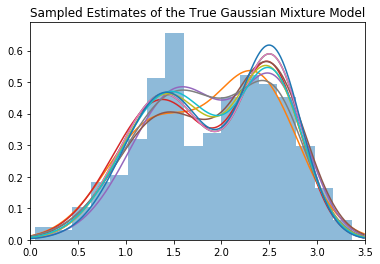

In [88]:
# display histogram of logged data
plt.hist(np.log(df.iloc[:,0]), bins=17, density=True, alpha = 0.5)

x = np.arange(0, 3.5, 0.01)

# use zip and list like previously, then convert to numpy object
thetamusigma = np.array(list(zip(posterior_samples['theta'], posterior_samples['mu'], posterior_samples['sigma'])))

# choose 10 random lists, each unit is a 3 X 2 matrix
for i in thetamusigma[np.random.randint(0, 4000, 10), ]:

    # Transpose each unit to a 2 X 3 matrix so that list comprehension can be used to generate the pdfs
    pdfs = [theta * ss.norm.pdf(x, mu, sigma) for theta, mu, sigma in np.transpose(i)]
    plt.plot(x, np.sum(np.array(pdfs), axis=0))
    
plt.title("Sampled Estimates of the True Gaussian Mixture Model")
plt.xlim(0, 3.5)
plt.show()